In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_excel('Telco-Customer-Churn.xlsx')
import warnings
warnings.filterwarnings('ignore')

In [3]:
df.head(100)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0.0,Yes,No,1.0,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0.0,No,No,34.0,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0.0,No,No,2.0,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0.0,No,No,45.0,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0.0,No,No,2.0,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,8637-XJIVR,Female,0.0,No,No,12.0,Yes,Yes,Fiber optic,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,78.95,927.35,Yes
96,9803-FTJCG,Male,0.0,Yes,Yes,71.0,Yes,Yes,DSL,Yes,...,No,Yes,No,No,One year,Yes,Credit card (automatic),66.85,4748.70,No
97,0278-YXOOG,Male,0.0,No,No,5.0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,21.05,113.85,Yes
98,3212-KXOCR,Male,0.0,No,No,52.0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),21.00,1107.20,No


# compare churn count with respect to gender

1.Compare churn count with respect to gender.


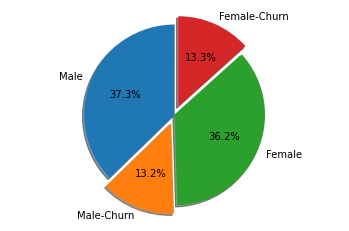

In [9]:
print('1.Compare churn count with respect to gender.')
q1c=df[df['Churn']=='Yes']
q1n=df[df['Churn']=='No']
labels='Male','Male-Churn','Female','Female-Churn'
sizes=[len(q1n[q1n['gender']=='Male'].index),len(q1c[q1c['gender']=='Male'].index),len(q1n[q1n['gender']=='Female'].index),len(q1c[q1c['gender']=='Female'].index)]
explode=(0,0.1,0,0.1) #only 'explode'the 2nd slice(i.e. 'Hogs')

plt.subplots()
plt.pie(sizes,explode=explode,labels=labels,autopct='%1.1f%%',shadow=True,startangle=90)
plt.axis('equal')
plt.show()

# Find out how many female senior citizens there in the dataset

Category_seniorcitizen
Female Senior citizen     568
Male Senior citizen       574
Other females            2920
Other males              2981
dtype: int64


<AxesSubplot:title={'center':'Age & Gender based count'}>

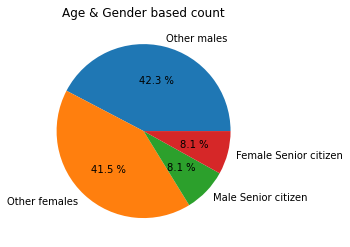

In [6]:
df1=df.copy()
conditions=[(df1['SeniorCitizen']==0) & (df1['gender']=='Male'),
           (df1['SeniorCitizen']==0) & (df1['gender']=='Female'),
           (df1['SeniorCitizen']==1) & (df1['gender']=='Male'),
           (df1['SeniorCitizen']==1) & (df1['gender']=='Female')]
values=['Other males','Other females','Male Senior citizen','Female Senior citizen']
df1['Category_seniorcitizen']=np.select(conditions, values) ## creates a new category based on gender and senior citizenship

print(df1.groupby('Category_seniorcitizen').size()) ## gives the count per category
df1['Category_seniorcitizen'].value_counts(normalize=True).plot.pie(autopct='%.1f %%', ylabel='', legend=False, title='Age & Gender based count')


# Compare 'tenure' with 'Total Charges'

3. Compare 'tenure' with 'Total Charges'.


<function matplotlib.pyplot.show(close=None, block=None)>

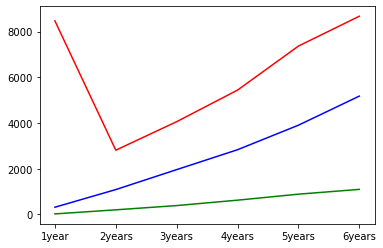

In [20]:
print("3. Compare 'tenure' with 'Total Charges'.")
tenure_mean = [df[df['tenure']<= 12.0][['TotalCharges']].mean(),df[df['tenure'].between(12.0,25.0)][['TotalCharges']].mean(),df[df['tenure'].between(24.0,37.0)][['TotalCharges']].mean(),df[df['tenure'].between(36.0,49.0)][['TotalCharges']].mean(),df[df['tenure'].between(48.0,61.0)][['TotalCharges']].mean(),df[df['tenure'].between(60.0,73.0)][['TotalCharges']].mean()]
tenure_min = [df[df['tenure']<= 12.0][['TotalCharges']].min(),df[df['tenure'].between(12.0,25.0)][['TotalCharges']].min(),df[df['tenure'].between(24.0,37.0)][['TotalCharges']].min(),df[df['tenure'].between(36.0,49.0)][['TotalCharges']].min(),df[df['tenure'].between(48.0,61.0)][['TotalCharges']].min(),df[df['tenure'].between(60.0,73.0)][['TotalCharges']].min()]
tenure_max = [df[df['tenure']<= 12.0][['TotalCharges']].max(),df[df['tenure'].between(12.0,25.0)][['TotalCharges']].max(),df[df['tenure'].between(24.0,37.0)][['TotalCharges']].max(),df[df['tenure'].between(36.0,49.0)][['TotalCharges']].max(),df[df['tenure'].between(48.0,61.0)][['TotalCharges']].max(),df[df['tenure'].between(60.0,73.0)][['TotalCharges']].max()]
total=['1year','2years','3years','4years','5years','6years']
plt.plot(total,tenure_mean,color='Blue')
plt.plot(total,tenure_min,color='green')
plt.plot(total,tenure_max,color='red')
plt.show

# Find out which contract is preferred by the senior citizen.


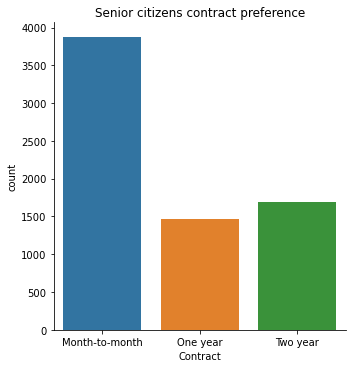

In [5]:
sen_cit=df.copy()
sen_cit.loc[sen_cit['SeniorCitizen']==0] ## filters out senior citizens
sns.catplot(x='Contract', kind="count", data=sen_cit).set(title='Senior citizens contract preference')



# Comment on your finds on Payment Method?

5. Comment on your finds on Payment Method?
['Electronic check' 'Mailed check' 'Credit card (automatic)'
 'Bank transfer (automatic)']
[1170, 778, 788, 752]


<function matplotlib.pyplot.show(close=None, block=None)>

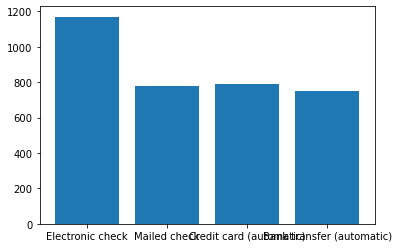

In [34]:
print('5. Comment on your finds on Payment Method?')
PaymentMethod = df.PaymentMethod.unique()
print(PaymentMethod)
vals=[len(df[df['PaymentMethod'] == 'Electronic check'].index),len(df[df['PaymentMethod'] == 'Mailed check'].index),len(df[df['PaymentMethod'] == 'Bank transfer (automatic)'].index),len(df[df['PaymentMethod'] == 'Credit card (automatic)'].index)]
print(vals)
plt.bar(PaymentMethod,vals)
plt.show      